# Online Advertising Performance Data

The dataset provides insights into the online advertising performance of a company, referred to as "Company X", from April 1, 2020, to June 30, 2020. The currency used for transactions is the US dollar.

## Metrics:

Day: Date of the advertising campaign.
Campaign: A segmentation variable set by Company X to target specific groups of users with advertisements.
User Engagement: Indicates the level of engagement of users targeted by the advertising campaign.
Banner: Represents the size of the ad served by an advertising platform, referred to as "Advert Firm A".
Placement: Denotes the publisher space where the ad is served by "Advert Firm A", such as websites or apps.
Displays: The number of ads served by "Advert Firm A" during the campaign period.
Cost: The price paid by "Advert Firm A" to serve the ads to the publisher. It reflects the placement cost of the advertisements.
Clicks: The number of times users clicked on the advertisements during the campaign.
Revenue: The price paid by Company X to "Advert Firm A" for the clicks generated through the advertising campaign.
Post Click Conversions: Represents on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.
Post Click Sales Amount: The monetary value of on-site transactions that occurred within the next 30 days after a user clicked on the advertisement.

## Additional Information:

- Engagement: This variable signifies the type of users targeted by the campaign based on their behavior or characteristics.
  
- Banner: Defines the size of the advertisement or impression served to users.

- Placement: Specifies the website or app where the advertisement is being served, without disclosing the specific names of publishers.

## Questions:

1.What is the overall trend in user engagement throughout the campaign period?

2.How does the size of the ad (banner) impact the number of clicks generated?

3.which publisher spaces (placements) yielded the highest number of displays and clicks?

4.Is there a correlation between the cost of serving ads and the revenue generated from clicks?

5.What is the average revenue generated per click for Company X during the campaign period?

6.Which campaigns had the highest post-click conversion rates?

7.Are there any specific trends or patterns in post-click sales amounts over time?

8.How does the level of user engagement vary across different banner sizes?

9.Which placement types result in the highest post-click conversion rates?

10.Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

11.Is there a correlation between user engagement levels and the revenue generated?

12.Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

13.How does the effectiveness of campaigns vary based on the size of the ad and placement type?

14.Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

15.What is the distribution of post-click conversions across different placement types?

16.Are there any noticeable differences in user engagement levels between weekdays and weekends?

17.How does the cost per click (CPC) vary across different campaigns and banner sizes?

18.Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

19.Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

20.How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

In [8]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline in Jupyter Notebook
%matplotlib inline

# Load dataset
# Assuming the dataset CSV file is named 'online_advertising_data.csv'
df = pd.read_csv(r"Datasets/online_advertising_performance_data.csv")

# Preview the dataset
print("Dataset Preview:")
display(df.head())

# Basic info to check datatypes and missing values
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values in each column:")
print(df.isnull().sum())

# Convert 'Day' to datetime format for time-based analysis
import calendar

month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Map the month names to numbers
df['month_num'] = df['month'].map(month_map)
df['date'] = pd.to_datetime('2020-' + df['month_num'].astype(str) + '-' + df['day'].astype(str), format='%Y-%m-%d')

# Optional: Fill or drop missing values if any
# For now, we drop rows with any missing values (can be adjusted later)
df.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)
df.dropna(inplace=True)

# Confirm no missing values remain
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Display basic statistics for numerical columns
print("\nStatistical Summary:")
display(df.describe())

# Check unique values in categorical columns for understanding
print("\nUnique values in categorical columns:")
categorical_cols = ['campaign_number', 'user_engagement', 'banner', 'placement']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Preview:


,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: floa

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,month_num,date
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995
mean,15.471957,15939.616939,11.683242,166.244215,18.423759,43.465555,2181.756135,4.882094,2020-05-12 05:19:47.195731968
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020-04-01 00:00:00
25%,8.000000,102.000000,0.030200,0.000000,0.000000,0.000000,0.000000,4.000000,2020-04-19 00:00:00
50%,15.000000,1336.000000,0.377500,7.000000,0.542300,0.000000,0.000000,5.000000,2020-05-10 00:00:00
75%,23.000000,9619.000000,2.705250,57.000000,4.000000,3.000000,185.275250,6.000000,2020-06-04 00:00:00
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,6.000000,2020-06-30 00:00:00
std,8.741317,44923.954378,45.950340,737.736875,98.059296,216.491678,10660.989934,0.823797,NaN



Unique values in categorical columns:
campaign_number: 3 unique values
user_engagement: 3 unique values
banner: 8 unique values
placement: 5 unique values


# Question 1: Overall trend in user engagement throughout the campaign period

This analysis examines how user engagement levels changed over the duration of the advertising campaign, from April 1 to June 30, 2020. By aggregating user engagement counts over time, we can identify any upward or downward trends, seasonal patterns, or anomalies.

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

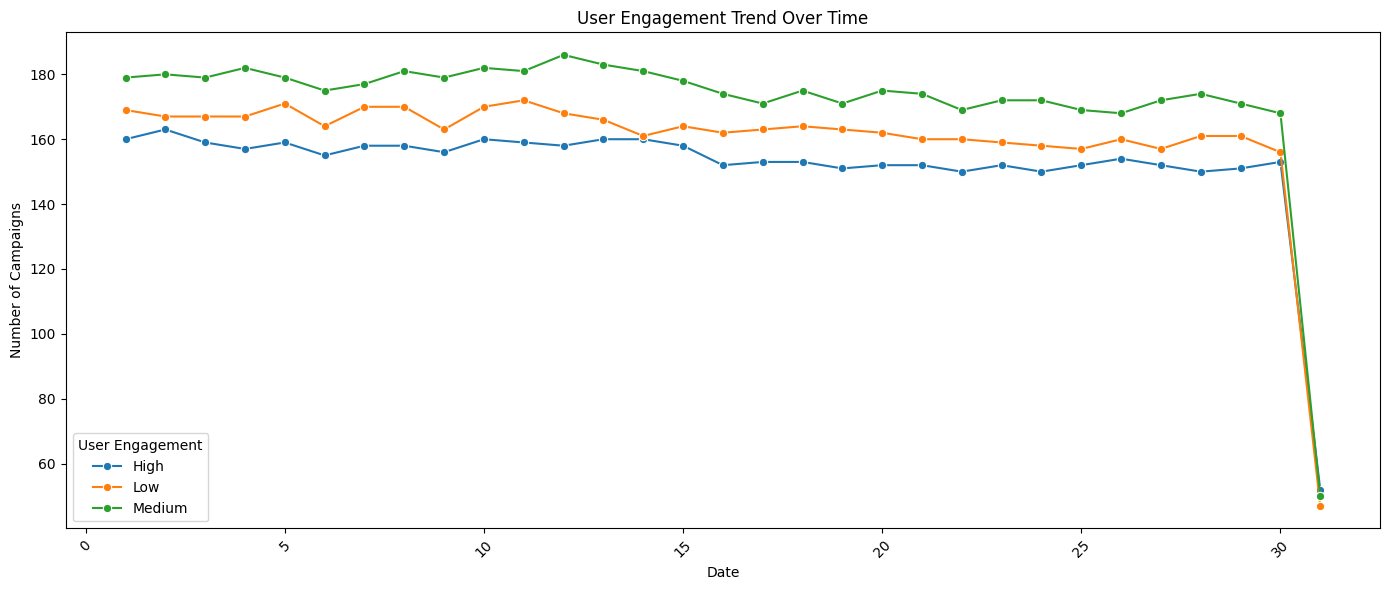

In [12]:
# Grouping data by date and engagement type
engagement_trend = df.groupby(['day', 'user_engagement']).size().reset_index(name='count')

# Plotting the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=engagement_trend, x='day', y='count', hue='user_engagement', marker='o')
plt.title('User Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.legend(title='User Engagement')
plt.tight_layout()
plt.show()


Peaks indicate days with more campaigns targeting a specific user engagement segment.

You’ll be able to see if "High Engagement" users were targeted more as the campaign progressed, or if it remained stable.

Helps understand which type of user (e.g., high, medium, low engagement) was a consistent target across the campaign timeline.

# Question 2: Impact of ad size (banner) on the number of clicks generated

This question explores the relationship between the size of advertisements (banner sizes) and the number of user clicks they received. Larger or differently sized ads may attract more attention, resulting in more clicks.

C:\Users\sedhu\AppData\Local\Temp\ipykernel_21372\2955626318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=banner_clicks, x='banner', y='clicks', palette='viridis')


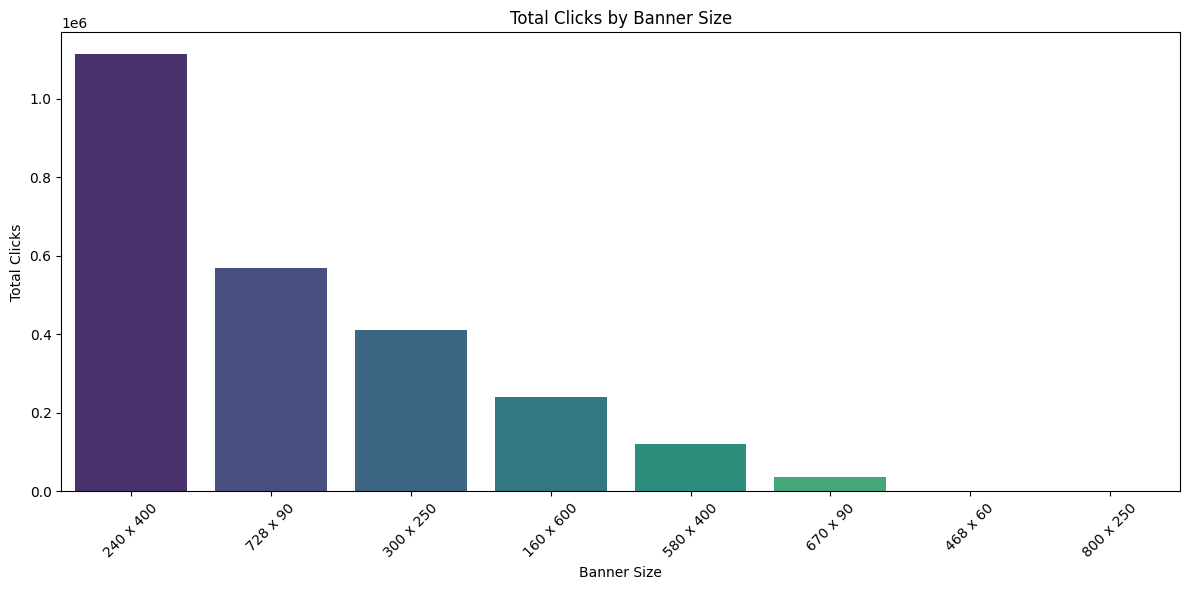

In [15]:
# Grouping by Banner and summing the Clicks
banner_clicks = df.groupby('banner')['clicks'].sum().reset_index().sort_values(by='clicks', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=banner_clicks, x='banner', y='clicks', palette='viridis')
plt.title('Total Clicks by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Taller bars = banner sizes generating more clicks.

This helps identify which ad dimensions are most effective in driving user interaction.

Useful for optimizing ad design and placement in future campaigns.

# Question 3: Publisher spaces (placements) yielding the highest displays and clicks
Here, we investigate which placement types — such as websites or apps where ads are served — generated the most ad impressions (displays) and user clicks. Identifying high-performing placements can help optimize future ad campaigns.



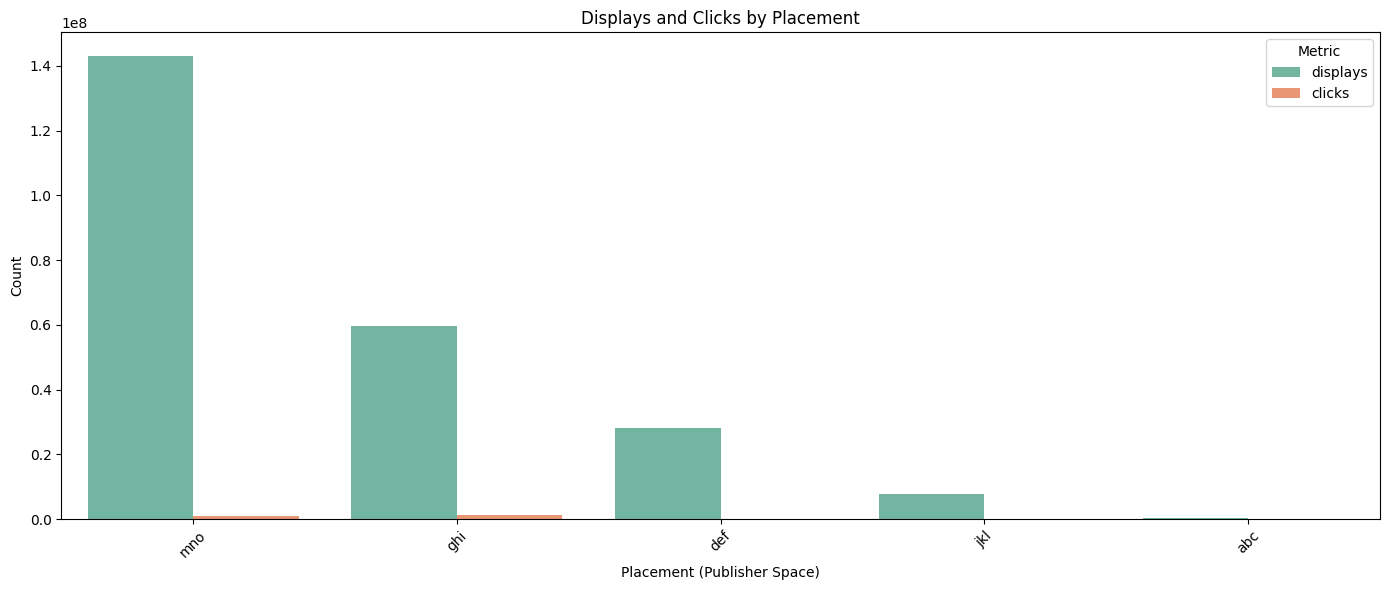

In [16]:
# Grouping by Placement
placement_stats = df.groupby('placement')[['displays', 'clicks']].sum().reset_index()
placement_stats = placement_stats.sort_values(by='displays', ascending=False)

# Melt data for better plotting
placement_melted = placement_stats.melt(id_vars='placement', value_vars=['displays', 'clicks'],
                                        var_name='metric', value_name='count')

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=placement_melted, x='placement', y='count', hue='metric', palette='Set2')
plt.title('Displays and Clicks by Placement')
plt.xlabel('Placement (Publisher Space)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()



Helps identify which publisher spaces are both:

Getting the most impressions (Displays), and

Driving high user interaction (Clicks).

Ideal placements would rank high in both metrics.

# Question 4: Correlation between cost of serving ads and revenue generated from clicks
This analysis checks whether there is a strong relationship between the money spent on serving ads and the revenue generated by those ads. A positive correlation would indicate effective spending.

<Figure size 1000x600 with 0 Axes>

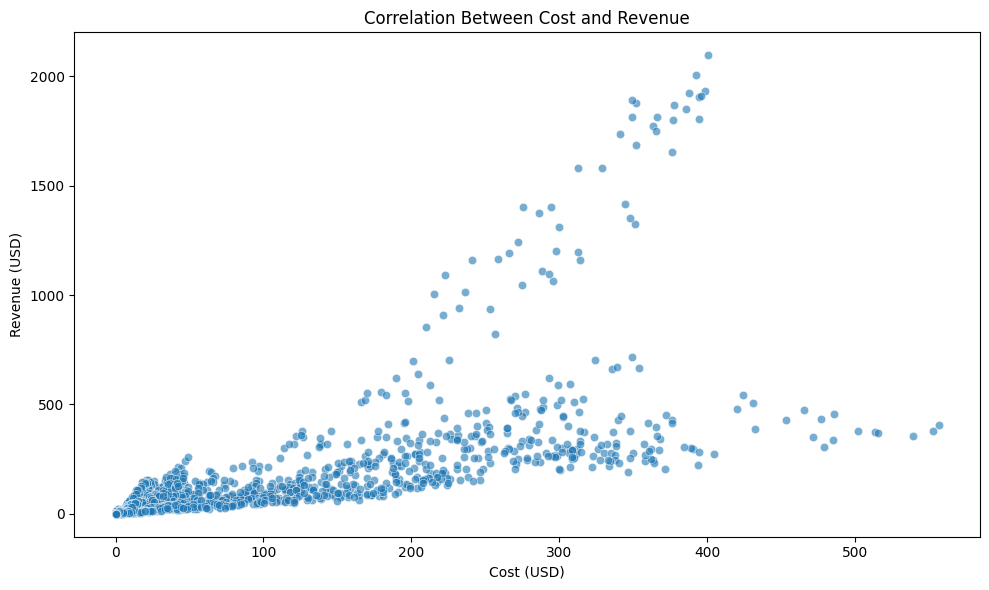

Correlation coefficient between Cost and Revenue: 0.7603


In [19]:
# Scatter plot: Cost vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cost', y='revenue', alpha=0.6)
plt.title('Correlation Between Cost and Revenue')
plt.xlabel('Cost (USD)')
plt.ylabel('Revenue (USD)')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['cost'].corr(df['revenue'])
print(f"Correlation coefficient between Cost and Revenue: {correlation:.4f}")



A positive correlation (close to +1) means higher costs are associated with higher revenues.

A negative correlation (close to -1) suggests the opposite.

Near zero means there's little to no linear relationship.



# Question 5: Average revenue generated per click during the campaign period
We calculate the average revenue Company X earned per click on their advertisements. This metric helps assess the profitability of the ad campaigns.

In [20]:
# Total revenue and total clicks
total_revenue = df['revenue'].sum()
total_clicks = df['clicks'].sum()

# Average revenue per click
average_rpc = total_revenue / total_clicks
print(f"Average Revenue Per Click: ${average_rpc:.4f}")


Average Revenue Per Click: $0.1108



The Revenue Per Click (RPC) metric shows how much revenue is earned on average from each user click.

A higher value suggests a more profitable campaign.

Can be used as a benchmark to evaluate ROI for future ad strategies.

# Question 6: Campaigns with the highest post-click conversion rates
Post-click conversions indicate users who completed a transaction within 30 days after clicking an ad. This question identifies which campaigns had the highest conversion efficiency.

In [24]:
# Aggregate post-click conversions and clicks by campaign
campaign_stats = df.groupby('campaign_number')[['post_click_conversions', 'clicks']].sum().reset_index()

# Avoid division by zero
campaign_stats = campaign_stats[campaign_stats['clicks'] > 0]

# Calculate conversion rate
campaign_stats['Conversion Rate (%)'] = (campaign_stats['post_click_conversions'] / campaign_stats['clicks']) * 100

# Sort and display top campaigns
top_campaigns = campaign_stats.sort_values(by='Conversion Rate (%)', ascending=False)
print("Top Campaigns by Post-Click Conversion Rate:\n")
print(top_campaigns[['campaign_number', 'Conversion Rate (%)']].head(10))


Top Campaigns by Post-Click Conversion Rate:

  campaign_number  Conversion Rate (%)
0          camp 1            44.927065
2          camp 3             2.427163
1          camp 2             1.562379



Shows which campaigns were most effective at converting clicks into actual post-click actions.

High conversion rates indicate high-quality targeting or messaging.

Useful for identifying top-performing campaigns worth scaling.

# Question 7: Trends or patterns in post-click sales amounts over time
This explores how the total value of on-site transactions (post-click sales amounts) fluctuated during the campaign period, highlighting possible trends or seasonal effects.

<Figure size 1400x600 with 0 Axes>

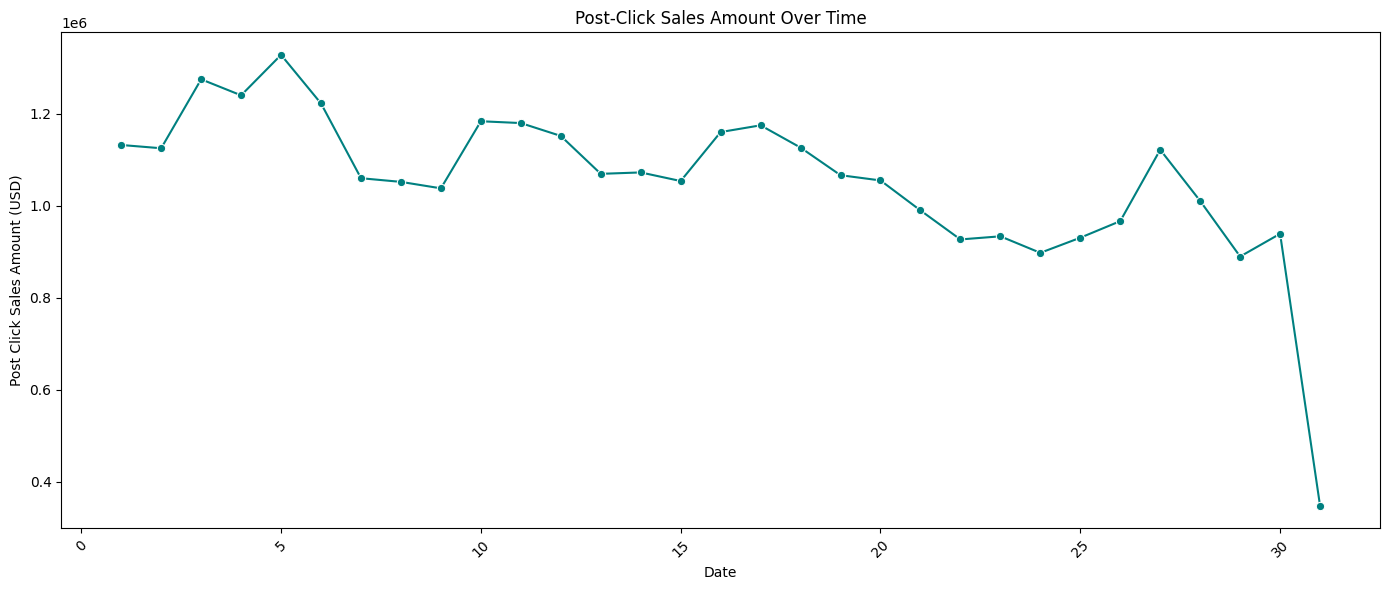

In [26]:
# Group by Day and sum Post Click Sales Amount
daily_sales = df.groupby('day')['post_click_sales_amount'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='day', y='post_click_sales_amount', marker='o', color='teal')
plt.title('Post-Click Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Post Click Sales Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Spikes may indicate days with highly successful campaigns or promotions.

Dips may help diagnose low-performing periods.

Look for weekly, monthly, or cyclical patterns that suggest behavioral or seasonal effects.

# Question 8: Variation in user engagement across different banner sizes
We examine how user engagement types differ according to the size of the advertisement banners. Certain banner sizes may attract distinct user groups or engagement behaviors.

<Figure size 1200x600 with 0 Axes>

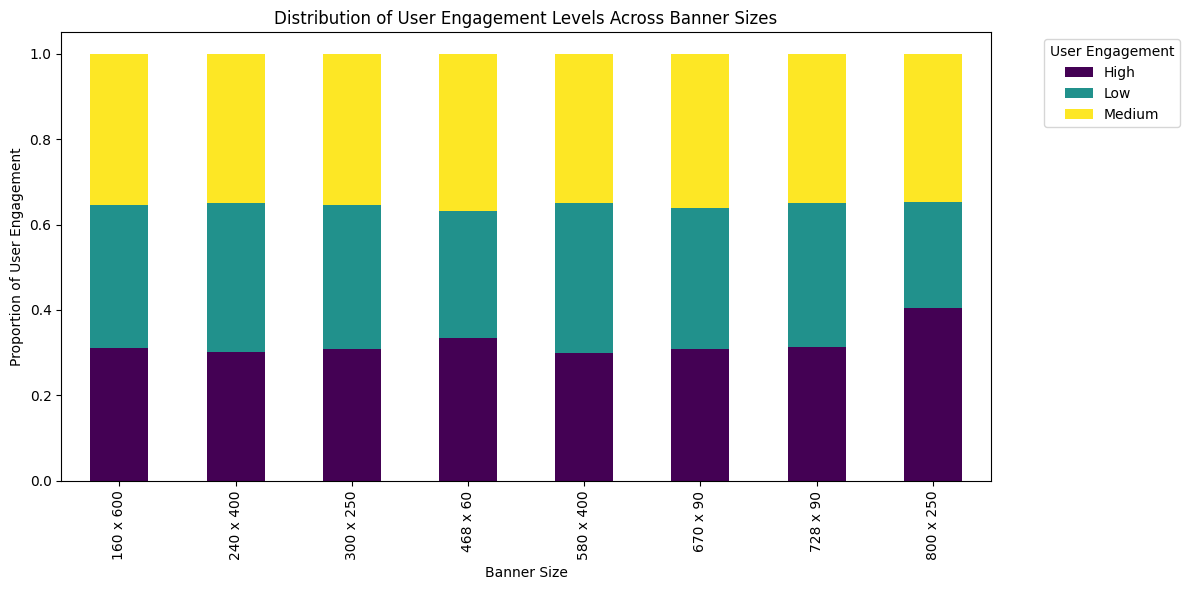

In [27]:
# Group by Banner and User Engagement and count occurrences
engagement_banner = df.groupby(['banner', 'user_engagement']).size().reset_index(name='Count')

# Pivot for better visualization
engagement_pivot = engagement_banner.pivot(index='banner', columns='user_engagement', values='Count').fillna(0)

# Normalize counts by row to get proportions
engagement_prop = engagement_pivot.div(engagement_pivot.sum(axis=1), axis=0)

# Plot the distribution of user engagement levels across banner sizes
plt.figure(figsize=(12, 6))
engagement_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))

plt.title('Distribution of User Engagement Levels Across Banner Sizes')
plt.xlabel('Banner Size')
plt.ylabel('Proportion of User Engagement')
plt.legend(title='User Engagement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We count how many times each user engagement type appears for each banner size.

Then convert these counts into proportions so we can compare relative levels across banner sizes.

The stacked bar chart clearly shows how engagement types distribute for each banner size.



# Question 9: Placement types resulting in the highest post-click conversion rates
This question identifies which publisher spaces produced the most effective conversions, helping to focus ad placements for better ROI.

C:\Users\sedhu\AppData\Local\Temp\ipykernel_21372\978056627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=placement_conversion, x='placement', y='Conversion Rate', palette='magma')


<Figure size 1200x600 with 0 Axes>

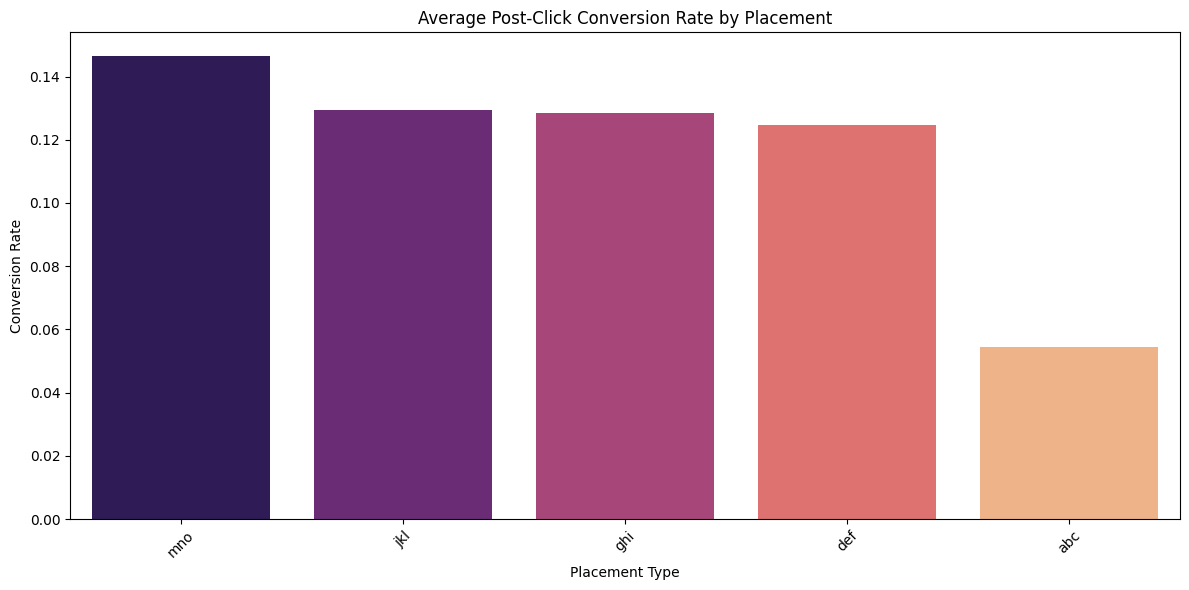

In [30]:
# Calculate conversion rate per row (handle division by zero)
df['Conversion Rate'] = np.where(df['clicks'] > 0, df['post_click_conversions'] / df['clicks'], 0)

# Group by Placement and get average conversion rate
placement_conversion = df.groupby('placement')['Conversion Rate'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=placement_conversion, x='placement', y='Conversion Rate', palette='magma')
plt.xticks(rotation=45)
plt.title('Average Post-Click Conversion Rate by Placement')
plt.ylabel('Conversion Rate')
plt.xlabel('Placement Type')
plt.tight_layout()
plt.show()



We create a new column Conversion Rate safely avoiding division errors.

Group by each Placement and take the average of this conversion rate.

The bar plot helps to easily compare placements and spot the top performers.

# Question 10: Seasonal patterns or fluctuations in displays and clicks throughout the campaign period
We analyze whether there are any noticeable periodic trends or seasonal fluctuations in ad impressions and clicks over the campaign dates.



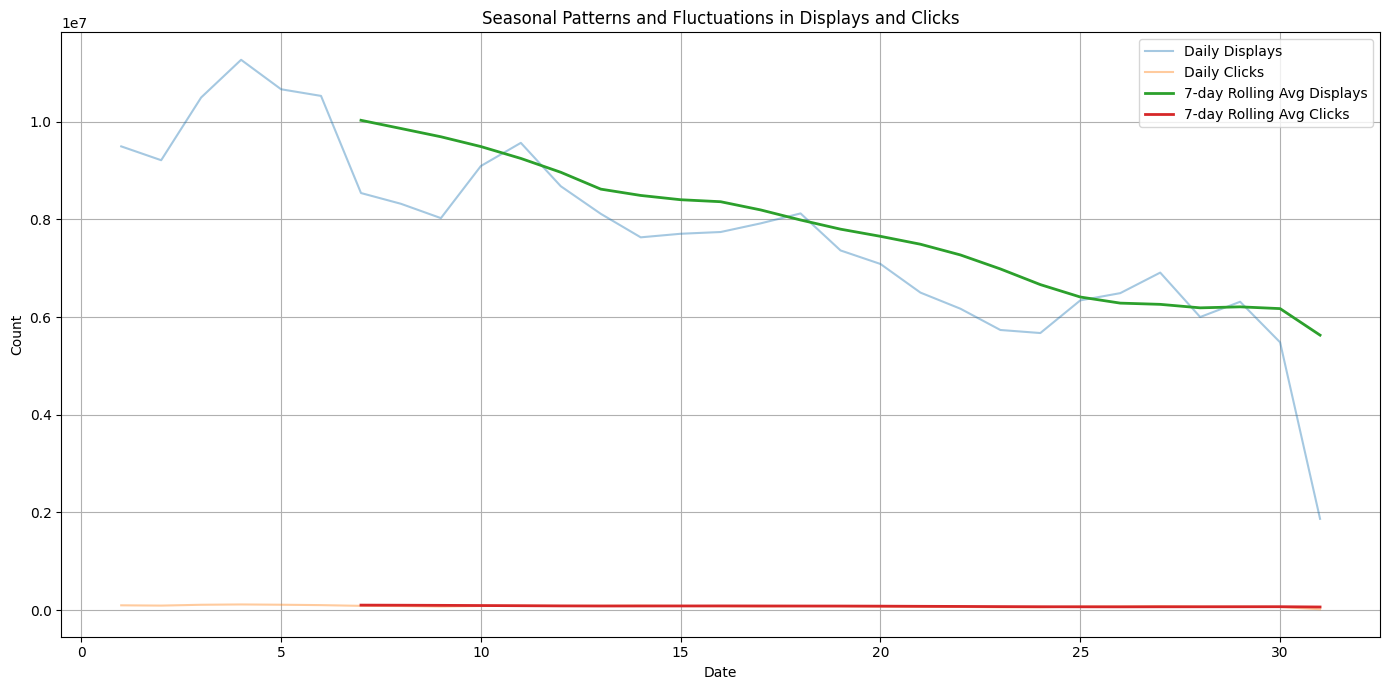

In [31]:
# Aggregate daily Displays and Clicks
daily_metrics = df.groupby('day')[['displays', 'clicks']].sum().reset_index()

# Calculate rolling mean (7-day window) for smoother trends
daily_metrics['Displays_RollingAvg'] = daily_metrics['displays'].rolling(window=7).mean()
daily_metrics['Clicks_RollingAvg'] = daily_metrics['clicks'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(14,7))
plt.plot(daily_metrics['day'], daily_metrics['displays'], label='Daily Displays', alpha=0.4)
plt.plot(daily_metrics['day'], daily_metrics['clicks'], label='Daily Clicks', alpha=0.4)
plt.plot(daily_metrics['day'], daily_metrics['Displays_RollingAvg'], label='7-day Rolling Avg Displays', linewidth=2)
plt.plot(daily_metrics['day'], daily_metrics['Clicks_RollingAvg'], label='7-day Rolling Avg Clicks', linewidth=2)

plt.title('Seasonal Patterns and Fluctuations in Displays and Clicks')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



We sum Displays and Clicks per day to see daily campaign activity.

Rolling averages smooth out daily variability to reveal underlying patterns.

The plot helps detect spikes, dips, or weekly trends indicating seasonality.

# Question 11: Correlation between user engagement levels and revenue generated
Here we check if different user engagement levels are associated with varying revenue outcomes from the ads.

C:\Users\sedhu\AppData\Local\Temp\ipykernel_21372\292605297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_revenue, x='user_engagement', y='revenue', palette='coolwarm')


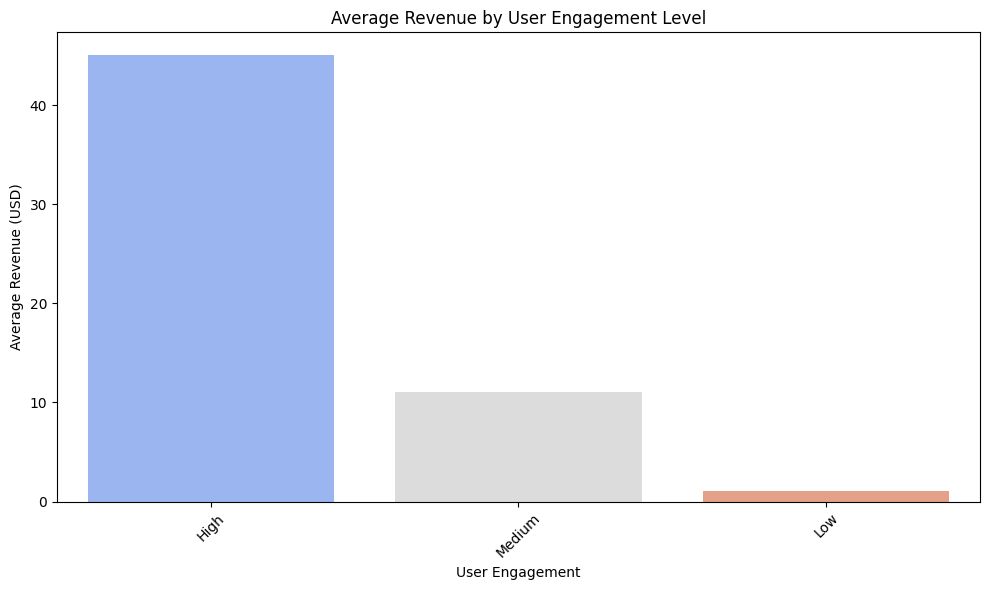

In [32]:
# Calculate average revenue per user engagement type
engagement_revenue = df.groupby('user_engagement')['revenue'].mean().reset_index()

# Sort for better visualization
engagement_revenue = engagement_revenue.sort_values(by='revenue', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=engagement_revenue, x='user_engagement', y='revenue', palette='coolwarm')
plt.title('Average Revenue by User Engagement Level')
plt.xlabel('User Engagement')
plt.ylabel('Average Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
# Encode User Engagement to numeric (example)
engagement_map = {k: v for v, k in enumerate(df['user_engagement'].unique())}
df['User Engagement Encoded'] = df['user_engagement'].map(engagement_map)

# Calculate correlation coefficient
corr = df[['User Engagement Encoded', 'revenue']].corr().iloc[0,1]
print(f"Correlation between User Engagement (encoded) and Revenue: {corr:.3f}")


Correlation between User Engagement (encoded) and Revenue: -0.137


# Question 12: Outliers in cost, clicks, or revenue warranting further investigation
This step identifies unusual or extreme values in advertising cost, number of clicks, or revenue, which might indicate errors, special campaigns, or exceptional events.

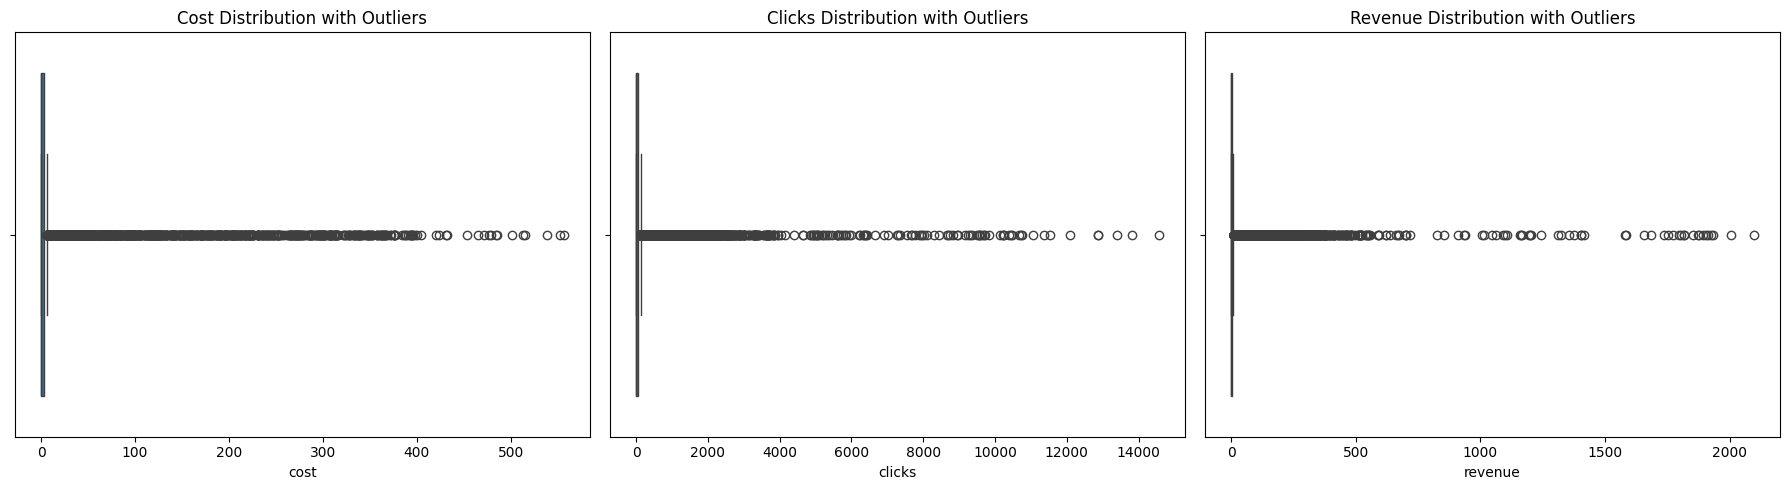

Number of outliers detected in 'cost': 2427
Number of outliers detected in 'clicks': 2208
Number of outliers detected in 'revenue': 2456


In [34]:
# Visualize distributions with boxplots
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.boxplot(x=df['cost'])
plt.title('Cost Distribution with Outliers')

plt.subplot(1,3,2)
sns.boxplot(x=df['clicks'])
plt.title('Clicks Distribution with Outliers')

plt.subplot(1,3,3)
sns.boxplot(x=df['revenue'])
plt.title('Revenue Distribution with Outliers')

plt.tight_layout()
plt.show()

# Optional: Identify outliers using IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers detected in '{col}': {len(outliers)}")
    return outliers

outliers_cost = detect_outliers_iqr(df, 'cost')
outliers_clicks = detect_outliers_iqr(df, 'clicks')
outliers_revenue = detect_outliers_iqr(df, 'revenue')



Boxplots visually highlight extreme values that deviate from the bulk of the data.

The IQR method quantitatively detects outliers by checking values outside 1.5 * IQR from Q1 and Q3.

This helps flag campaigns or placements with unusual costs, clicks, or revenues for deeper review.

# Question 13: Effectiveness of campaigns based on ad size and placement type
We analyze how campaign performance varies with different combinations of ad banner sizes and placement types.

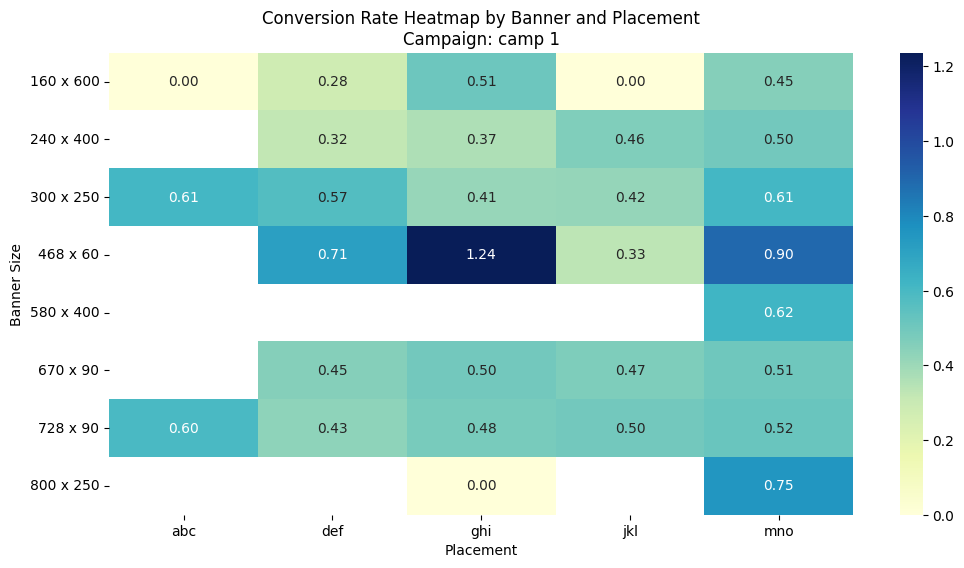

In [39]:
# Calculate conversion rate safely
df['Conversion Rate'] = np.where(df['clicks'] > 0, df['post_click_conversions'] / df['clicks'], 0)

# Group by Campaign, Banner, and Placement
grouped = df.groupby(['campaign_number', 'banner', 'placement']).agg({
    'post_click_conversions': 'sum',
    'clicks': 'sum',
    'revenue': 'sum',
    'cost': 'sum'
}).reset_index()

# Calculate conversion rate and ROI
grouped['Conversion Rate'] = np.where(grouped['clicks'] > 0, grouped['post_click_conversions'] / grouped['clicks'], 0)
grouped['ROI'] = np.where(grouped['cost'] > 0, grouped['revenue'] / grouped['cost'], 0)

# Example: Pivot for heatmap - Conversion Rate by Banner and Placement for a specific Campaign
campaign_example = grouped[grouped['campaign_number'] == grouped['campaign_number'].unique()[0]]  # Choose first campaign for demo

pivot_conv = campaign_example.pivot(index='banner', columns='placement', values='Conversion Rate')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_conv, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title(f'Conversion Rate Heatmap by Banner and Placement\nCampaign: {grouped["campaign_number"].unique()[0]}')
plt.ylabel('Banner Size')
plt.xlabel('Placement')
plt.show()



Conversion rate and ROI are calculated per combination of campaign, banner size, and placement.

The heatmap shows how conversion rates vary by banner size and placement for a given campaign.

You can repeat or extend this for ROI or other campaigns by changing the filter.

# Question 14: Campaigns or banner sizes that consistently outperform others in ROI
Return on Investment (ROI) helps identify which campaigns and banner sizes yield the best returns relative to their costs.

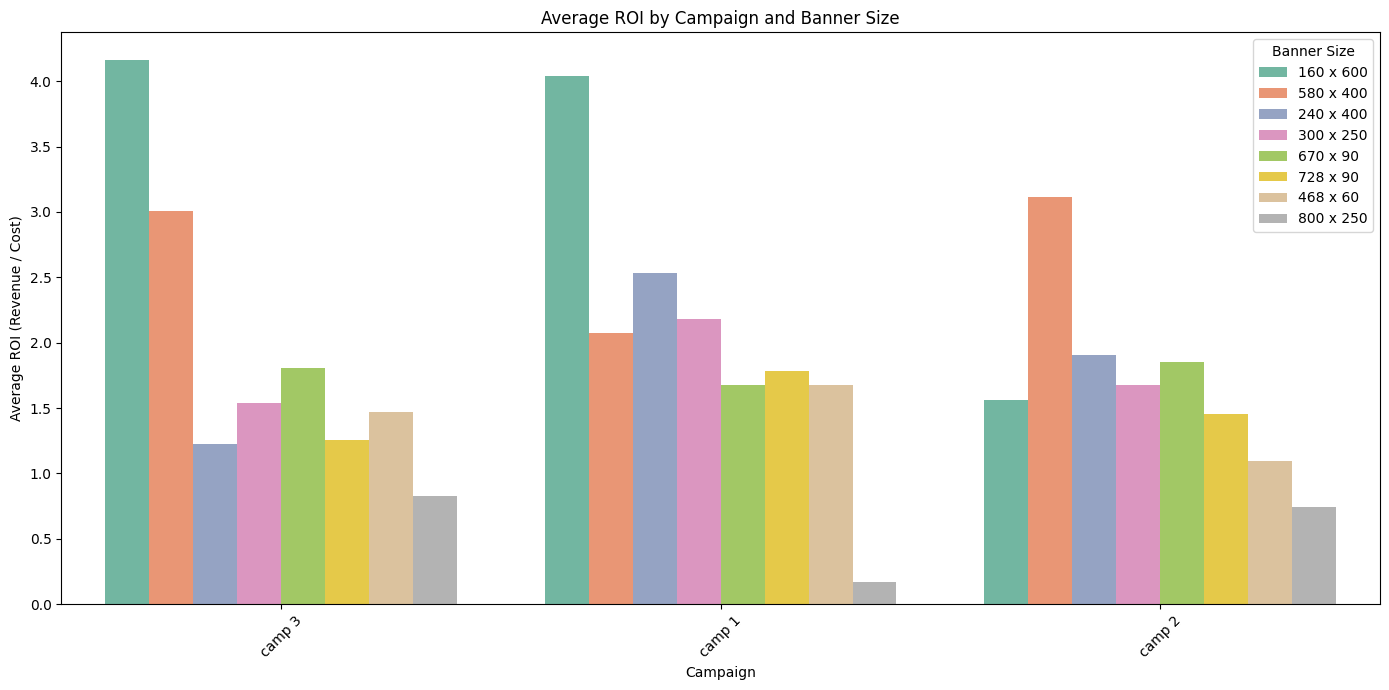

In [40]:
# Calculate ROI for each row safely
df['ROI'] = np.where(df['cost'] > 0, df['revenue'] / df['cost'], 0)

# Group by Campaign and Banner size and calculate average ROI
roi_summary = df.groupby(['campaign_number', 'banner'])['ROI'].mean().reset_index()

# Sort by ROI descending
roi_summary = roi_summary.sort_values(by='ROI', ascending=False)

# Plot grouped barplot
plt.figure(figsize=(14,7))
sns.barplot(data=roi_summary, x='campaign_number', y='ROI', hue='banner', palette='Set2')
plt.title('Average ROI by Campaign and Banner Size')
plt.xlabel('Campaign')
plt.ylabel('Average ROI (Revenue / Cost)')
plt.xticks(rotation=45)
plt.legend(title='Banner Size')
plt.tight_layout()
plt.show()



ROI is calculated row-wise then averaged by campaign and banner size.

The bar chart helps identify campaigns and banner sizes with higher returns on investment.

This helps spot consistently high-performing campaigns/banner combinations.

# Question 15: Distribution of post-click conversions across different placement types
This explores how post-click conversions are spread across various publisher placements.

C:\Users\sedhu\AppData\Local\Temp\ipykernel_21372\3131035534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversions_by_placement, x='placement', y='post_click_conversions', palette='Blues_d')


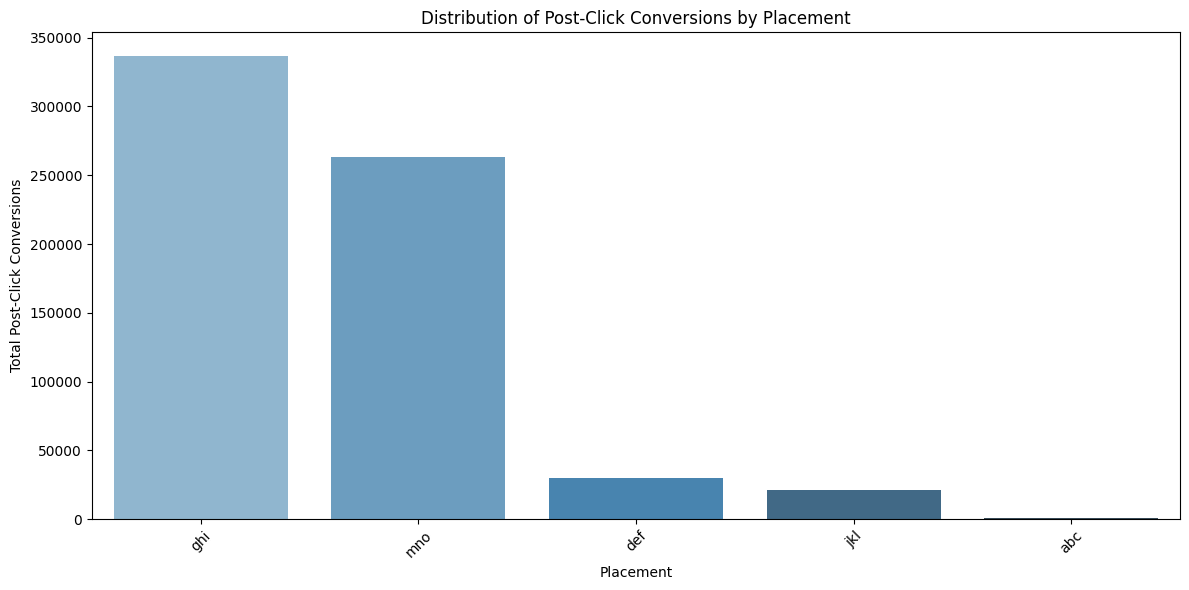

In [41]:
# Sum post-click conversions by placement
conversions_by_placement = df.groupby('placement')['post_click_conversions'].sum().reset_index()

# Sort placements by conversions
conversions_by_placement = conversions_by_placement.sort_values(by='post_click_conversions', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=conversions_by_placement, x='placement', y='post_click_conversions', palette='Blues_d')
plt.title('Distribution of Post-Click Conversions by Placement')
plt.xlabel('Placement')
plt.ylabel('Total Post-Click Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



We aggregate post-click conversions per placement to understand which publisher spaces yield more conversions.

The bar plot provides a clear comparative view.

# Question 16: Differences in user engagement levels between weekdays and weekends
We investigate whether user engagement varies significantly between weekdays and weekends, which could inform scheduling of campaigns.

In [43]:
df.head

<bound method NDFrame.head of        month  day campaign_number user_engagement     banner placement  \
0      April    1          camp 1            High  160 x 600       abc   
1      April    1          camp 1            High  160 x 600       def   
2      April    1          camp 1            High  160 x 600       ghi   
3      April    1          camp 1            High  160 x 600       mno   
4      April    1          camp 1             Low  160 x 600       def   
...      ...  ...             ...             ...        ...       ...   
15403  April    1          camp 1             Low  160 x 600       ghi   
15404  April    1          camp 1             Low  160 x 600       mno   
15405   June   29          camp 1            High  800 x 250       ghi   
15406   June   29          camp 1            High  800 x 250       mno   
15407   June   29          camp 3            High  240 x 400       def   

       displays      cost  clicks   revenue  post_click_conversions  \
0         

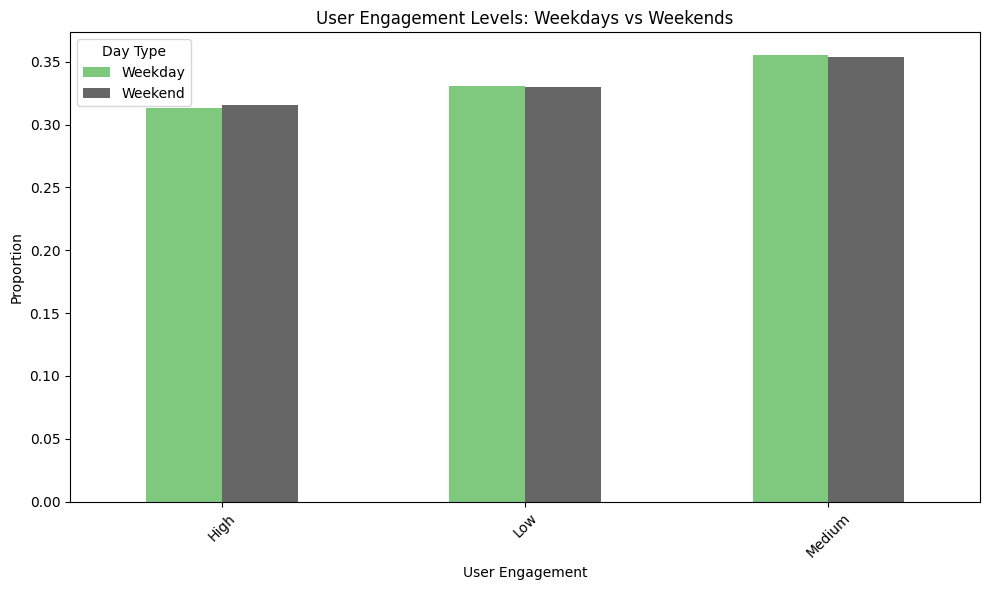

In [45]:
# Create a new column for day of the week
df['DayOfWeek'] = df['date'].dt.day_name()

# Define weekday or weekend
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Count of user engagement by DayType
engagement_daytype = df.groupby(['DayType', 'user_engagement']).size().reset_index(name='Count')

# Pivot for visualization
engagement_pivot = engagement_daytype.pivot(index='user_engagement', columns='DayType', values='Count').fillna(0)

# Normalize by column to get proportions
engagement_prop = engagement_pivot.div(engagement_pivot.sum(axis=0), axis=1)

# Plot
engagement_prop.plot(kind='bar', figsize=(10,6), colormap='Accent')
plt.title('User Engagement Levels: Weekdays vs Weekends')
plt.xlabel('User Engagement')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()



This code groups user engagement counts by whether the day is a weekday or weekend.

Then it normalizes counts to proportions for fair comparison.

The grouped bar chart shows if engagement types differ between weekdays and weekends.

# Question 17: Variation in cost per click (CPC) across campaigns and banner sizes
Cost per click measures the efficiency of ad spend; this question analyzes how CPC varies by campaign and banner size.

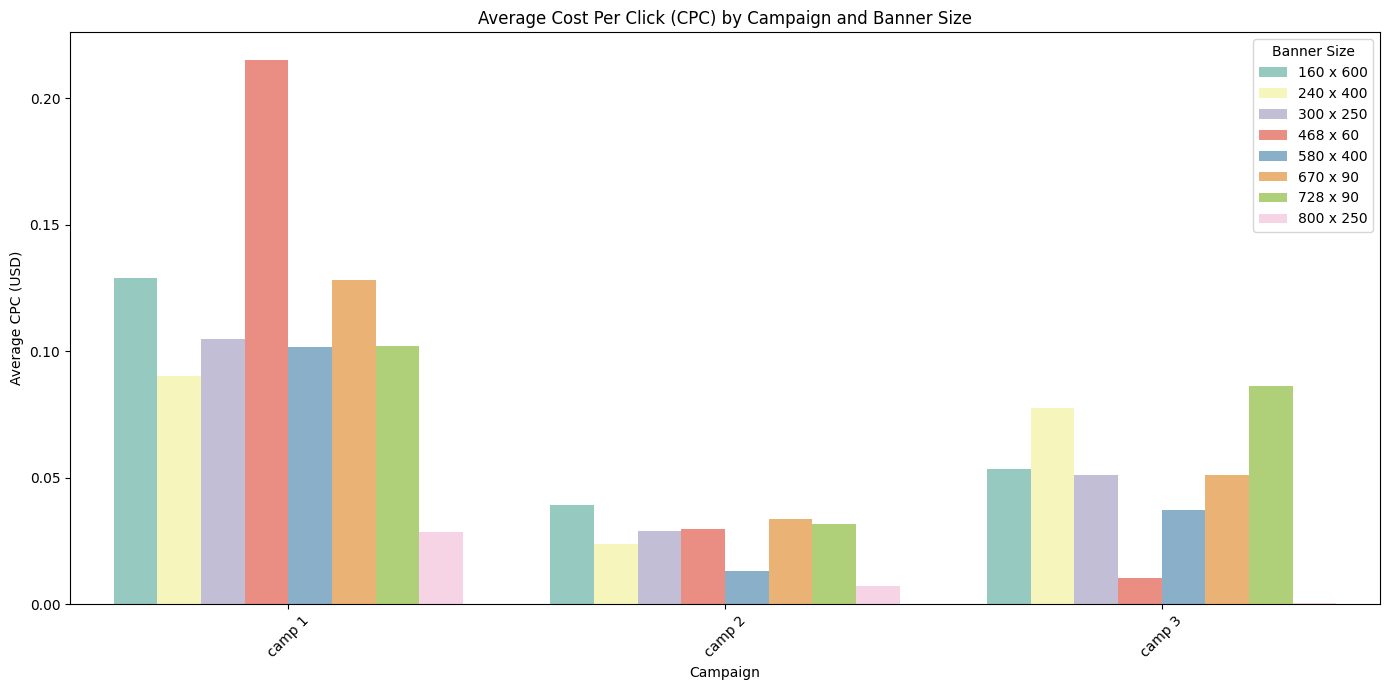

In [47]:
# Calculate CPC safely
df['CPC'] = np.where(df['clicks'] > 0, df['cost'] / df['clicks'], np.nan)

# Group by Campaign and Banner to calculate average CPC
cpc_summary = df.groupby(['campaign_number', 'banner'])['CPC'].mean().reset_index()

# Plot
plt.figure(figsize=(14,7))
sns.barplot(data=cpc_summary, x='campaign_number', y='CPC', hue='banner', palette='Set3')
plt.title('Average Cost Per Click (CPC) by Campaign and Banner Size')
plt.xlabel('Campaign')
plt.ylabel('Average CPC (USD)')
plt.xticks(rotation=45)
plt.legend(title='Banner Size')
plt.tight_layout()
plt.show()



CPC is computed where clicks are non-zero.

The grouped bar plot reveals how cost efficiency (cost per click) varies by campaign and ad size.

This helps identify which combinations deliver cheaper clicks.

# Question 18: Campaigns or placements particularly cost-effective in generating post-click conversions
This identifies the most cost-efficient campaigns and placements in terms of generating actual conversions.

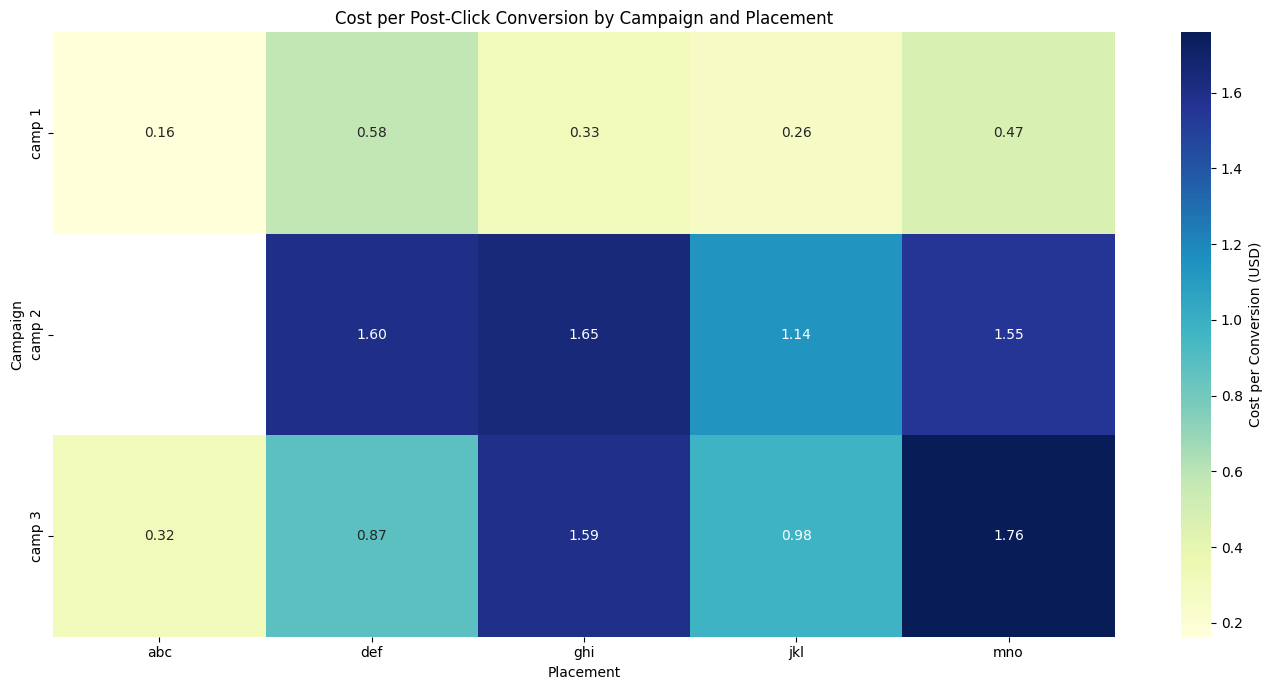

In [48]:
# Calculate cost per post-click conversion safely
df['Cost per Conversion'] = np.where(df['post_click_conversions'] > 0, df['cost'] / df['post_click_conversions'], np.nan)

# Group by Campaign and Placement to get average cost per conversion
cost_conv_summary = df.groupby(['campaign_number', 'placement'])['Cost per Conversion'].mean().reset_index()

# Pivot for heatmap
pivot_cost_conv = cost_conv_summary.pivot(index='campaign_number', columns='placement', values='Cost per Conversion')

plt.figure(figsize=(14,7))
sns.heatmap(pivot_cost_conv, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Cost per Conversion (USD)'})
plt.title('Cost per Post-Click Conversion by Campaign and Placement')
plt.ylabel('Campaign')
plt.xlabel('Placement')
plt.tight_layout()
plt.show()



Lower cost per conversion indicates higher cost-effectiveness.

Heatmap makes it easy to spot campaigns and placements with low cost per conversion (darker colors).

NaN values show groups with zero conversions, ignored in visualization.

# Question 19: Trends or patterns in post-click conversion rates based on day of the week
Here we look for weekday or weekend effects on conversion rates.

C:\Users\sedhu\AppData\Local\Temp\ipykernel_21372\696364336.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_by_day, x='DayOfWeek', y='Conversion Rate', palette='viridis')


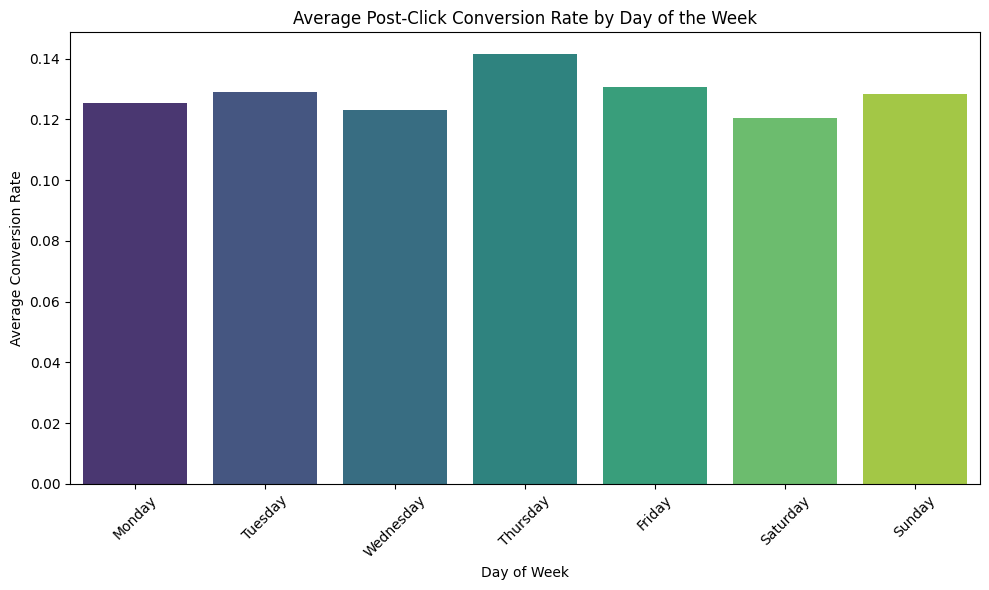

In [50]:
# Extract day of week name
df['DayOfWeek'] = df['date'].dt.day_name()

# Calculate conversion rate per row safely
df['Conversion Rate'] = np.where(df['clicks'] > 0, df['post_click_conversions'] / df['clicks'], 0)

# Group by day of week and calculate average conversion rate
conversion_by_day = df.groupby('DayOfWeek')['Conversion Rate'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=conversion_by_day, x='DayOfWeek', y='Conversion Rate', palette='viridis')
plt.title('Average Post-Click Conversion Rate by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Days ordered Monday through Sunday for clarity.

This shows if conversion rates vary systematically over the week, indicating trends or cyclical patterns.

# Question 20: Effectiveness of campaigns across different user engagement types for post-click conversions
This question analyzes how conversion effectiveness varies by user engagement segments within each campaign.

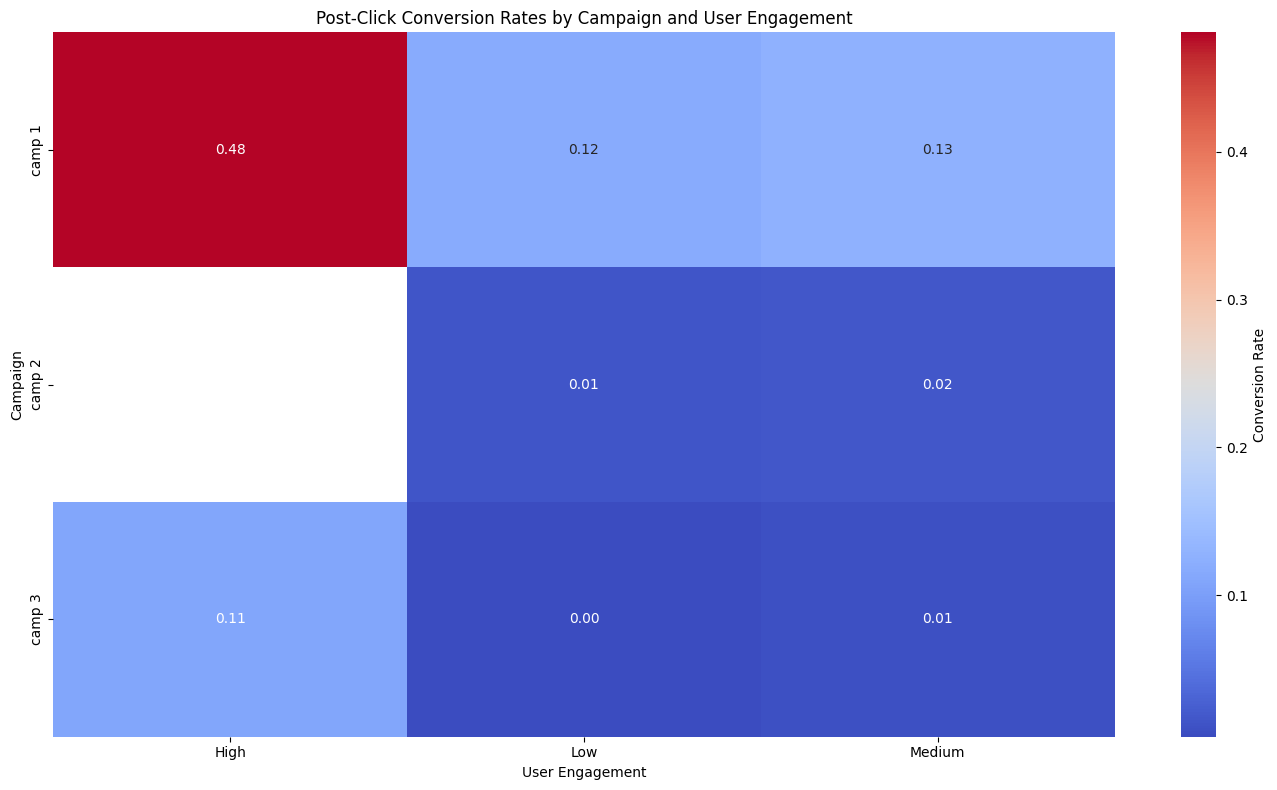

In [51]:
# Calculate conversion rate safely
df['Conversion Rate'] = np.where(df['clicks'] > 0, df['post_click_conversions'] / df['clicks'], 0)

# Group by Campaign and User Engagement
engagement_campaign = df.groupby(['campaign_number', 'user_engagement']).agg({
    'post_click_conversions': 'sum',
    'clicks': 'sum'
}).reset_index()

# Calculate conversion rate
engagement_campaign['Conversion Rate'] = np.where(
    engagement_campaign['clicks'] > 0,
    engagement_campaign['post_click_conversions'] / engagement_campaign['clicks'],
    0
)

# Pivot for heatmap
pivot_engagement = engagement_campaign.pivot(index='campaign_number', columns='user_engagement', values='Conversion Rate')

plt.figure(figsize=(14,8))
sns.heatmap(pivot_engagement, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Conversion Rate'})
plt.title('Post-Click Conversion Rates by Campaign and User Engagement')
plt.xlabel('User Engagement')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()



This heatmap displays how conversion rates differ across campaigns and user engagement types.

Helps identify which user engagement types yield better conversions in each campaign.